In [ ]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
from os.path import join

dataset_dir = 'D:\Project\FYP\dataset'
datasets = ["mito-60x-noise1-lowsnr.tif",
            "actin-confocal-lowsnr.tif",
            "actin-60x-noise1-lowsnr.tif"]
file_paths = [join(dataset_dir, dataset) for dataset in datasets]

config = N2VConfig(file_paths, patch_shape=(128, 128),
                   validation_split=0.05,
                   patches_per_batch=32,
                   data_augmentation=False,
                   epochs=20)
n2v_data_generator = N2VDataGenerator(config)
unet = Unet(config)
history = unet.train(n2v_data_generator)

In [8]:
import matplotlib.pyplot as plt
a=n2v_data_generator.get_training_batch()
inputs, targets=next(a)
outputs=unet.model.predict(inputs)

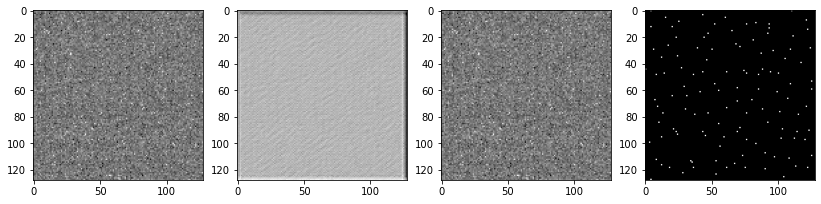

In [11]:
plt.figure(figsize=(14,7))
index=19
plt.subplot(141)
plt.imshow(inputs[index,...,0],cmap="gray")
plt.subplot(142)
plt.imshow(outputs[index,...,0],cmap="gray")
plt.subplot(143)
plt.imshow(targets[index,...,0],cmap="gray")
plt.subplot(144)
plt.imshow(targets[index,...,1],cmap="gray")